In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt 
from scipy.stats import kurtosis, skew, boxcox, boxcox_normmax
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay
import warnings
warnings.filterwarnings("ignore")

In [52]:
!pip install lifelines matplotlib pandas


In [53]:
data = pd.read_csv('breastcancer.csv')

In [54]:
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patients_Vital_Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [55]:
data.dtypes

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [57]:
data.columns


Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patients_Vital_Status'],
      dtype='object')

In [58]:
data.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [59]:
data.shape

(2509, 34)

In [60]:
data.info

<bound method DataFrame.info of      Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0       MB-0000             75.65             Mastectomy  Breast Cancer   
1       MB-0002             43.19      Breast Conserving  Breast Cancer   
2       MB-0005             48.87             Mastectomy  Breast Cancer   
3       MB-0006             47.68             Mastectomy  Breast Cancer   
4       MB-0008             76.97             Mastectomy  Breast Cancer   
...         ...               ...                    ...            ...   
2504  MTS-T2428             70.05                    NaN  Breast Cancer   
2505  MTS-T2429             63.60                    NaN  Breast Cancer   
2506  MTS-T2430               NaN                    NaN  Breast Cancer   
2507  MTS-T2431               NaN                    NaN  Breast Cancer   
2508  MTS-T2432               NaN                    NaN  Breast Cancer   

                           Cancer Type Detailed Cellularity Chemoth

In [61]:
data.duplicated().sum()

np.int64(0)

In [62]:
data.drop_duplicates()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patients_Vital_Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [63]:
data.dropna()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patients_Vital_Status
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
10,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Negative,Yes,36.09,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
11,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,...,Deceased,Negative,No,35.79,Recurred,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,MB-6232,71.22,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumA,5.0,Positve,...,Deceased,Positive,No,83.88,Not Recurred,Female,ER+/HER2- Low Prolif,30.0,2.0,Died of Other Causes
1698,MB-6233,70.65,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumB,5.0,Positve,...,Living,Positive,Yes,198.52,Not Recurred,Female,ER+/HER2- Low Prolif,20.0,1.0,Living
1700,MB-6237,75.62,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,Basal,5.0,Negative,...,Deceased,Negative,No,103.82,Not Recurred,Female,ER-/HER2-,20.0,1.0,Died of Other Causes
1702,MB-6239,52.84,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,Normal,5.0,Positve,...,Living,Positive,Yes,197.70,Not Recurred,Female,ER+/HER2- High Prolif,20.0,2.0,Living


In [64]:
data['Age at Diagnosis'].fillna(data['Age at Diagnosis'].median(), inplace=True)
data['Cellularity'].fillna(data['Cellularity'].mode()[0], inplace=True)
data['Chemotherapy'].fillna(data['Chemotherapy'].mode()[0], inplace=True)
data['ER status measured by IHC'].fillna(data['ER status measured by IHC'].mode()[0], inplace=True)
data['ER Status'].fillna(data['ER Status'].mode()[0], inplace=True)
data['HER2 status measured by SNP6'].fillna(data['HER2 status measured by SNP6'].mode()[0], inplace=True)
data['HER2 Status'].fillna(data['HER2 Status'].mode()[0], inplace=True)
data['Mutation Count'].fillna(data['Mutation Count'].mode()[0], inplace=True)
data['Radio Therapy'].fillna(data['Radio Therapy'].mode()[0], inplace=True)
data['Tumor Size'].fillna(data['Tumor Size'].median(), inplace=True)
data['Tumor Stage'].fillna(data['Tumor Stage'].median(), inplace=True)
data['PR Status'].fillna(data['PR Status'].mode()[0], inplace=True)
data['Patients_Vital_Status'].dropna()

0                     Living
1                     Living
2            Died of Disease
3                     Living
4            Died of Disease
                ...         
1980                  Living
1981         Died of Disease
1982         Died of Disease
1983    Died of Other Causes
1984    Died of Other Causes
Name: Patients_Vital_Status, Length: 1980, dtype: object

In [133]:
data['Patients_Vital_Status'].dropna()

0       2
1       2
2       0
3       2
4       0
       ..
2504    3
2505    3
2506    3
2507    3
2508    3
Name: Patients_Vital_Status, Length: 2509, dtype: int64

In [134]:
le = LabelEncoder()
data['Type of Breast Surgery']= le.fit_transform(data['Type of Breast Surgery'])
data['Cellularity']= le.fit_transform(data['Cellularity'])
data['Chemotherapy']= le.fit_transform(data['Chemotherapy'])
data['ER Status']= le.fit_transform(data['ER Status'])
data['PR Status']= le.fit_transform(data['PR Status'])
data['HER2 Status']= le.fit_transform(data['HER2 Status'])
data['Pam50 + Claudin-low subtype']= le.fit_transform(data['Pam50 + Claudin-low subtype'])
data['Relapse Free Status']= le.fit_transform(data['Relapse Free Status'])
data['Cancer Type']= le.fit_transform(data['Cancer Type'])
data['Cancer Type Detailed']= le.fit_transform(data['Cancer Type Detailed'])
data['ER status measured by IHC']= le.fit_transform(data['ER status measured by IHC'])
data['Radio Therapy']= le.fit_transform(data['Radio Therapy'])
data['Radio Therapy']= le.fit_transform(data['Radio Therapy'])
data['Radio Therapy']= le.fit_transform(data['Radio Therapy'])
data['Patients_Vital_Status']= le.fit_transform(data['Patients_Vital_Status'])


In [135]:
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patients_Vital_Status
0,MB-0000,75.65,1,0,2,0,0,6,1.0,1,...,Living,0,1,138.65,0,Female,ER-/HER2-,4.972343,2.021334,2
1,MB-0002,43.19,0,0,2,0,0,2,1.0,1,...,Living,1,1,83.52,0,Female,ER+/HER2- High Prolif,3.288283,1.006344,2
2,MB-0005,48.87,1,0,2,0,1,3,1.0,1,...,Deceased,1,0,151.28,1,Female,NaN,4.111340,2.021334,0
3,MB-0006,47.68,1,0,5,2,1,3,1.0,1,...,Living,1,1,162.76,0,Female,NaN,5.279108,2.021334,2
4,MB-0008,76.97,1,0,5,0,1,3,1.0,1,...,Deceased,1,1,18.55,1,Female,ER+/HER2- High Prolif,6.497006,2.021334,0


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   int64  
 3   Cancer Type                     2509 non-null   int64  
 4   Cancer Type Detailed            2509 non-null   int64  
 5   Cellularity                     2509 non-null   int64  
 6   Chemotherapy                    2509 non-null   int64  
 7   Pam50 + Claudin-low subtype     2509 non-null   int64  
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2509 non-null   int64  
 10  ER Status                       2509 non-null   int64  
 11  Neoplasm Histologic Grade       2509 non-null   int64  
 12  HER2 status measured by SNP6    25

In [137]:
data.head(15)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patients_Vital_Status
0,MB-0000,75.65,1,0,2,0,0,6,1.0,1,...,Living,0,1,138.65,0,Female,ER-/HER2-,4.972343,2.021334,2
1,MB-0002,43.19,0,0,2,0,0,2,1.0,1,...,Living,1,1,83.52,0,Female,ER+/HER2- High Prolif,3.288283,1.006344,2
2,MB-0005,48.87,1,0,2,0,1,3,1.0,1,...,Deceased,1,0,151.28,1,Female,NaN,4.111340,2.021334,0
3,MB-0006,47.68,1,0,5,2,1,3,1.0,1,...,Living,1,1,162.76,0,Female,NaN,5.279108,2.021334,2
4,MB-0008,76.97,1,0,5,0,1,3,1.0,1,...,Deceased,1,1,18.55,1,Female,ER+/HER2- High Prolif,6.497006,2.021334,0
5,MB-0010,78.77,1,0,2,2,0,3,1.0,1,...,Deceased,1,1,2.89,1,Female,ER+/HER2- High Prolif,5.818478,4.066853,0
6,MB-0014,56.45,0,0,2,2,1,3,1.0,1,...,Living,1,1,162.17,0,Female,NaN,3.288283,2.021334,2
7,MB-0020,70.00,1,0,3,0,1,5,1.0,0,...,Deceased,0,1,11.74,1,Female,ER-/HER2-,7.916931,3.041980,0
8,MB-0022,89.08,0,0,5,2,0,6,1.0,1,...,Deceased,0,1,98.22,0,Female,NaN,5.648081,2.021334,1
9,MB-0025,76.24,2,0,2,0,0,7,1.0,1,...,NaN,1,1,126.32,1,Female,NaN,6.059320,2.021334,3


In [138]:
data['Patients_Vital_Status'] = data['Patients_Vital_Status'].fillna(data['Patients_Vital_Status'].mode())

In [139]:
data['Patients_Vital_Status'].value_counts()

Patients_Vital_Status
2    837
0    646
3    529
1    497
Name: count, dtype: int64

In [140]:
print('Type of Breast Surgery' , data['Type of Breast Surgery'].unique(), data['Type of Breast Surgery'].value_counts())

Type of Breast Surgery [1 0 2] Type of Breast Surgery
1    1170
0     785
2     554
Name: count, dtype: int64


In [141]:
print('Age at Diagnosis' , data['Age at Diagnosis'].unique(), data['Age at Diagnosis'].value_counts())

Age at Diagnosis [75.65 43.19 48.87 ... 72.   64.35 67.58] Age at Diagnosis
61.11    13
52.00    11
45.00    11
47.00    10
64.00    10
         ..
59.42     1
47.87     1
69.58     1
70.02     1
44.64     1
Name: count, Length: 1843, dtype: int64


In [142]:
print('Cellularity' , data['Cellularity'].unique(), data['Cellularity'].value_counts())


Cellularity [0 2 1] Cellularity
0    1557
2     737
1     215
Name: count, dtype: int64


In [143]:
print('Chemotherapy' , data['Chemotherapy'].unique(), data['Chemotherapy'].value_counts())

Chemotherapy [0 1] Chemotherapy
0    2097
1     412
Name: count, dtype: int64


In [144]:
print('ER Status' , data['ER Status'].unique(), data['ER Status'].value_counts())

ER Status [1 0] ER Status
1    1865
0     644
Name: count, dtype: int64


In [145]:
print('PR Status', data['PR Status'].unique(), data['PR Status'].value_counts())

PR Status [0 1] PR Status
1    1569
0     940
Name: count, dtype: int64


In [146]:
print('HER2 Status', data['HER2 Status'].unique(), data['HER2 Status'].value_counts())

HER2 Status [0 1] HER2 Status
0    2262
1     247
Name: count, dtype: int64


In [147]:
print('Pam50 + Claudin-low subtype', data['Pam50 + Claudin-low subtype'].unique(), data['Pam50 + Claudin-low subtype'].value_counts())

Pam50 + Claudin-low subtype [6 2 3 5 7 1 0 4] Pam50 + Claudin-low subtype
2    700
7    529
3    475
1    224
6    218
0    209
5    148
4      6
Name: count, dtype: int64


In [148]:
print('Neoplasm Histologic Grade', data['Neoplasm Histologic Grade'].unique(), data['Neoplasm Histologic Grade'].value_counts())

Neoplasm Histologic Grade [3 2 1] Neoplasm Histologic Grade
3    1319
2     976
1     214
Name: count, dtype: int64


In [149]:
print('Tumor Size', data['Tumor Size'].unique(), data['Tumor Size'].value_counts())

Tumor Size [ 4.97234342  3.28828293  4.11134041  5.2791084   6.49700641  5.81847828
  7.91693149  5.64808144  6.05931996  4.25053591  5.55957869  4.86317857
  4.63269546  6.2112029   5.98086599  5.07787857  4.3834226   4.51063036
  3.64763659  7.12806646  5.18005373  3.81088433  3.96508882  7.40863272
  5.73433844  6.4276305   8.1493462   6.82566534  5.4686889  10.80709265
  7.67071803  5.37525628  4.75007856  3.08831718  6.136071    8.57918742
  6.35691341  0.77445508  7.24270556  6.76219951  7.00994549  1.30692296
  2.06971771  6.88808581  3.47399973  7.29879226  6.9495002   5.90061831
  8.01145164  6.6976466   6.6319622  11.52125082  7.51552441  1.72329916
  9.33035685  6.2847931   8.9704547   2.87124908 11.05620242  8.73986681
 10.2687969   7.77098169  0.          7.06945659  9.29561554  8.05792125
  2.6332072   6.56509897  2.36873062  8.36963906  7.18580628  9.97596152
  7.72115746  8.53807941  8.19432663 11.56558099  8.7791376   8.10388184
  8.89490842  7.96445968  7.56792079] Tu

In [150]:
print('Tumor Stage', data['Tumor Stage'].unique(), data['Tumor Stage'].value_counts())

Tumor Stage [2.02133387 1.00634375 4.0668528  3.04198006 0.        ] Tumor Stage
2.021334    1700
1.006344     630
3.041980     144
0.000000      24
4.066853      11
Name: count, dtype: int64


In [151]:
print('Lymph nodes examined positive', data['Lymph nodes examined positive'].unique(), data['Lymph nodes examined positive'].value_counts())

Lymph nodes examined positive [1.75244611 0.         0.63070885 1.15130868 1.6461923  0.93499013
 1.79671512 2.1305961  1.2987405  1.96362342 1.41262144 1.90548894
 1.50452264 0.94729034 1.7027155  2.09599079 1.58102229 2.07721327
 1.87257223 1.83650778 2.14659947 2.32885663 1.93571659 2.03616462
 1.98950923 2.01362103 2.11375381 2.16183563 2.05731308 2.22848843
 2.25152329 2.36078199 2.21627012] Lymph nodes examined positive
0.000000    1196
0.630709     379
0.934990     266
0.947290     189
1.151309     127
1.298741      63
1.504523      52
1.412621      49
1.581022      29
1.646192      22
1.702715      18
1.905489      17
1.752446      14
1.796715      14
1.963623      11
1.935717      10
1.836508       9
1.872572       7
2.013621       6
1.989509       5
2.095991       4
2.036165       4
2.057313       3
2.077213       3
2.130596       2
2.113754       2
2.146599       2
2.328857       1
2.161836       1
2.228488       1
2.251523       1
2.360782       1
2.216270       1
Name: cou

In [152]:
print('Mutation Count', data['Mutation Count'].unique(), data['Mutation Count'].value_counts())

Mutation Count [1.89691546 0.74320788 0.         1.5962924  1.22790143 2.37621335
 2.57549781 3.07268506 3.47072308 2.7557272  2.15264354 3.34636936
 4.18452311 2.9205653  4.27016189 3.21410048 4.72704628 3.69946996
 4.35273699 3.90634466 4.58430797 4.09555259 4.43248432 3.80534593
 3.58815304 5.44425123 5.73945803 4.86183719 4.00294396 6.99234287
 4.92654988 5.1697688 ] Mutation Count
1.896915    479
1.596292    321
1.227901    306
2.152644    292
0.743208    251
2.376213    209
0.000000    151
2.575498    146
2.755727    114
2.920565     64
3.072685     47
3.214100     34
3.346369     20
3.470723     19
3.588153     14
3.699470     10
3.805346      6
4.095553      5
4.270162      4
3.906345      3
4.002944      2
4.352737      2
4.184523      1
4.727046      1
4.432484      1
4.584308      1
5.739458      1
5.444251      1
4.861837      1
6.992343      1
4.926550      1
5.169769      1
Name: count, dtype: int64


In [153]:
print('Nottingham prognostic index', data['Nottingham prognostic index'].unique(), data['Nottingham prognostic index'].value_counts())

Nottingham prognostic index [6.044      4.02       4.03       4.05       6.08       4.062
 6.13       4.058      6.68       5.032      3.056      3.044
 2.042      5.038      6.072      4.066      3.046      4.072
 3.058      4.034      4.046      3.036      4.032      3.024
 4.1        3.048      3.026      5.028      4.11       5.06
 3.042      4.078      3.068      5.08       4.14       4.036
 4.09       2.14       2.054      6.3        5.034      3.06
 4.12       5.052      3.04       2.018      3.07       4.026
 3.028      6.048      2.034      3.16       5.044      5.07
 4.06       4.054      3.032      6.052      5.076      4.038
 6.1        4.024      1.056      2.004      4.044      2.046
 1.046      4.028      5.054      6.104      5.048      3.078
 3.052      4.04       6.088      4.048      2.04       4.088
 4.042      6.068      3.05       5.1        6.096      2.026
 6.038      5.042      6.056      6.036      4.076      5.05
 2.02       4.056      3.006      5.01       3

In [154]:
print('Relapse Free Status', data['Relapse Free Status'].unique(), data['Relapse Free Status'].value_counts())

Relapse Free Status [0 1 2] Relapse Free Status
0    1486
1    1002
2      21
Name: count, dtype: int64


In [155]:
data['Type of Breast Surgery'] = data['Type of Breast Surgery'].fillna(data['Type of Breast Surgery'].mode())
data['Age at Diagnosis'] = data['Age at Diagnosis'].fillna(data['Age at Diagnosis'].mean())
data['Cellularity'] = data['Cellularity'].fillna(data['Cellularity'].mode())
data['Chemotherapy'] = data['Chemotherapy'].fillna(data['Chemotherapy'].mode())
data['ER Status'] = data['ER Status'].fillna(data['ER Status'].mode())
data['PR Status'] = data['PR Status'].fillna(data['PR Status'].mode())
data['HER2 Status'] = data['HER2 Status'].fillna(data['HER2 Status'].mode())
data['Pam50 + Claudin-low subtype'] = data['Pam50 + Claudin-low subtype'].fillna(data['Pam50 + Claudin-low subtype'].mode())
data['Neoplasm Histologic Grade'] = data['Neoplasm Histologic Grade'].fillna(data['Neoplasm Histologic Grade'].median())
data['Neoplasm Histologic Grade'] = data['Neoplasm Histologic Grade'].astype(int)
data['Tumor Size'] = data['Tumor Size'].fillna(data['Tumor Size'].mean())
data['Tumor Size'] = data['Tumor Size'].astype(int)
data['Tumor Stage'] = data['Tumor Stage'].fillna(data['Tumor Stage'].mean())
data['Lymph nodes examined positive'] = data['Lymph nodes examined positive'].fillna(data['Lymph nodes examined positive'].mean())
data['Mutation Count'] = data['Mutation Count'].fillna(data['Mutation Count'].mean())
data['Nottingham prognostic index'] = data['Nottingham prognostic index'].fillna(data['Nottingham prognostic index'].mean())
data['Relapse Free Status'] = data['Relapse Free Status'].fillna(data['Relapse Free Status'].mode())

In [156]:
data.isnull().sum()

Patient ID                          0
Age at Diagnosis                    0
Type of Breast Surgery              0
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                         0
Chemotherapy                        0
Pam50 + Claudin-low subtype         0
Cohort                             11
ER status measured by IHC           0
ER Status                           0
Neoplasm Histologic Grade           0
HER2 status measured by SNP6        0
HER2 Status                         0
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive       0
Mutation Count                      0
Nottingham prognostic index         0
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                           0
Radio Therap

In [157]:
data['Tumor Size'].value_counts()

Tumor Size
4     1044
5      699
6      284
3      236
7      144
8       34
2       27
0       17
9        9
1        8
10       4
11       3
Name: count, dtype: int64

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   int64  
 3   Cancer Type                     2509 non-null   int64  
 4   Cancer Type Detailed            2509 non-null   int64  
 5   Cellularity                     2509 non-null   int64  
 6   Chemotherapy                    2509 non-null   int64  
 7   Pam50 + Claudin-low subtype     2509 non-null   int64  
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2509 non-null   int64  
 10  ER Status                       2509 non-null   int64  
 11  Neoplasm Histologic Grade       2509 non-null   int64  
 12  HER2 status measured by SNP6    25

In [159]:
data['Patients_Vital_Status'].value_counts()

Patients_Vital_Status
2    837
0    646
3    529
1    497
Name: count, dtype: int64

<Axes: >

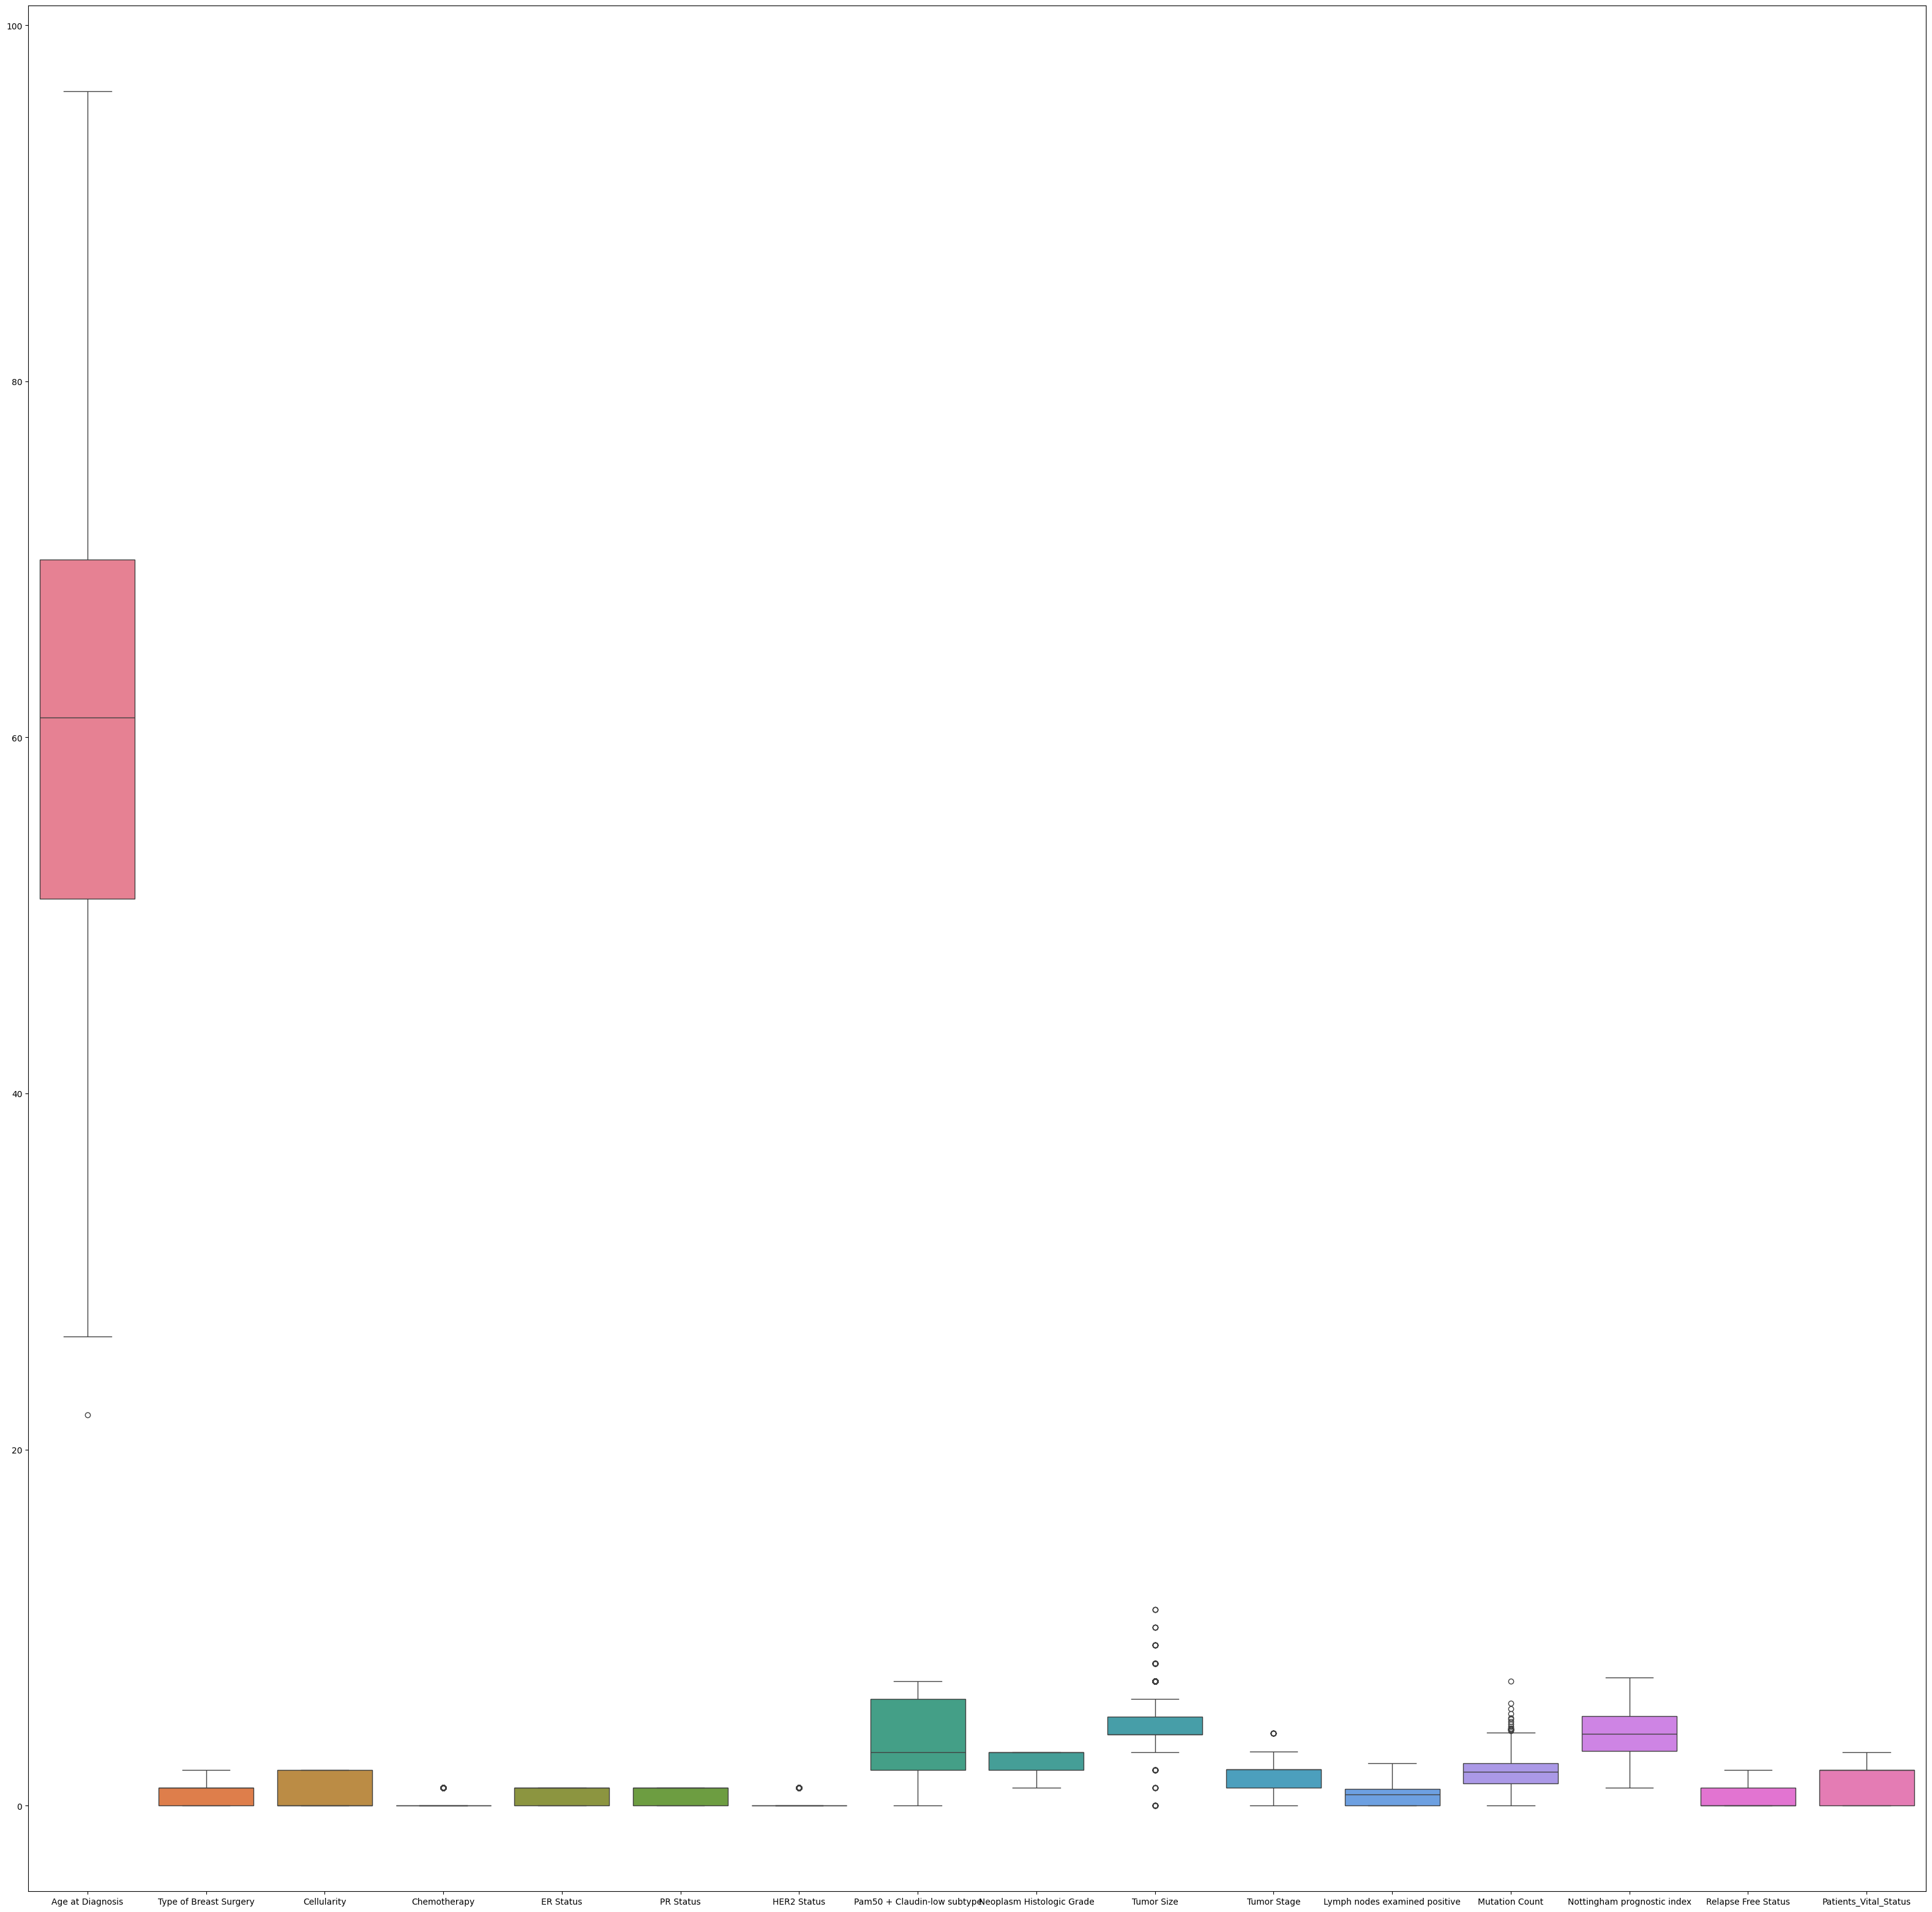

In [160]:
fig, ax=plt.subplots(figsize = (40,40))
sns.boxplot(data[['Age at Diagnosis','Type of Breast Surgery','Cellularity','Chemotherapy','ER Status',
              'PR Status','HER2 Status','Pam50 + Claudin-low subtype',
              'Neoplasm Histologic Grade','Tumor Size', 'Tumor Stage', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Relapse Free Status','Patients_Vital_Status']])

In [161]:
print(data['Tumor Stage'].unique())
print(data['Tumor Stage'].isna().sum(), "NaNs")
print((data['Tumor Stage'] <= 0).sum(), "zeros or negatives")


[2.02133387 1.00634375 4.0668528  3.04198006 0.        ]
0 NaNs
24 zeros or negatives


In [162]:
print(data['Tumor Size'].unique())
print(data['Tumor Size'].isna().sum(), "NaNs")
print((data['Tumor Size'] <= 0).sum(), "zeros or negatives")

[ 4  3  5  6  7  8 10  0  1  2 11  9]
0 NaNs
17 zeros or negatives


In [163]:
print(data['Mutation Count'].unique())
print(data['Mutation Count'].isna().sum(), "NaNs")
print((data['Mutation Count'] <= 0).sum(), "zeros or negatives")

[1.89691546 0.74320788 0.         1.5962924  1.22790143 2.37621335
 2.57549781 3.07268506 3.47072308 2.7557272  2.15264354 3.34636936
 4.18452311 2.9205653  4.27016189 3.21410048 4.72704628 3.69946996
 4.35273699 3.90634466 4.58430797 4.09555259 4.43248432 3.80534593
 3.58815304 5.44425123 5.73945803 4.86183719 4.00294396 6.99234287
 4.92654988 5.1697688 ]
0 NaNs
151 zeros or negatives


In [184]:
import numpy as np
from scipy.stats import boxcox

# Step 1: Replace NaNs if any
df['Tumor Size'].fillna(df['Tumor Size'].mean(), inplace=True)

# Step 2: Shift the data if min <= 0
if df['Tumor Size'].min() <= 0:
    df['Tumor Size'] = df['Tumor Size'] + abs(df['Tumor Size'].min()) + 1

# Step 3: Apply Box-Cox
transformed, fitted_lambda = boxcox(df['Tumor Size'])

# Step 4: Store transformed values
df['Tumor Size'] = transformed  

print("✅ Box-Cox transformation done successfully.")
print("Optimal λ for Tumor Size:", fitted_lambda)


✅ Box-Cox transformation done successfully.
Optimal λ for Tumor Size: 0.8240934224800877


In [ ]:
col = data['Tumor Stage']
col = col - col.min() + 1
data['Tumor Stage'] = boxcox(col, boxcox_normmax(col))

col2 = data['Lymph nodes examined positive']
col2 = col2 - col2.min() + 1
data['Lymph nodes examined positive'] = boxcox(col2, boxcox_normmax(col2))

col3 = data['Tumor Size']
col3 = col3 - col3.min() + 1
data['Tumor Size'] = boxcox(col3, boxcox_normmax(col3))


col4 = data['Mutation Count']
col4 = col4 - col4.min() + 1
data['Mutation Count'] = boxcox(col4, boxcox_normmax(col4))

In [ ]:
data['Tumor Size'].info()

In [ ]:
fig, ax=plt.subplots(figsize = (30,30))
sns.boxplot(data[['Tumor Size', 'Tumor Stage', 'Lymph nodes examined positive',
       'Mutation Count']])

In [ ]:
sns.pairplot(data)

In [ ]:
fig, ax=plt.subplots(figsize = (20,20))
sns.histplot(data[['Age at Diagnosis']])

In [ ]:
fig, ax=plt.subplots(figsize = (20,20))
sns.histplot(data[['Tumor Size']])

In [ ]:
fig, ax=plt.subplots(figsize = (20,20))
sns.histplot(data[['Lymph nodes examined positive']])

In [ ]:
fig, ax=plt.subplots(figsize = (20,20))
sns.histplot(data[['Mutation Count']])

In [ ]:
fig, ax=plt.subplots(figsize = (20,20))
sns.histplot(data[['Nottingham prognostic index']])

In [ ]:
#deine X and y

X = data[['Age at Diagnosis','Chemotherapy','ER Status',
          'PR Status','HER2 Status','Mutation Count',
          'Neoplasm Histologic Grade', 'Tumor Stage','Lymph nodes examined positive']]
y = data['Tumor Size']

In [ ]:
# Drop rows with missing Tumor Size
df = data.dropna(subset=["Tumor Size"]).copy()

In [ ]:
# Select predictors
predictors = [
    "Age at Diagnosis",
    "Chemotherapy",
    "ER Status",
    "PR Status",
    "HER2 Status",
    "Neoplasm Histologic Grade",
    "Tumor Stage",
    "Lymph nodes examined positive",
    "Mutation Count",
    "Nottingham prognostic index"
]

df = df[predictors + ["Tumor Size"]]

In [ ]:
# Encode categoricals
cat_cols = ["Chemotherapy", "ER Status", "PR Status", "HER2 Status"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [ ]:
# Drop remaining NaNs
df = df.dropna()

In [ ]:
# Convert everything to float
df = df.astype(float)

In [ ]:
# Define X and y
X = df.drop("Tumor Size", axis=1)
y = df["Tumor Size"]

# Add constant
X = sm.add_constant(X)

# Fit OLS
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

In [165]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out=0.10, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS """
    
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed=True
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        
        if not changed:
            break
    return included

In [166]:
# Prepare data again
df = data.dropna(subset=["Tumor Size"]).copy()
df = df[predictors + ["Tumor Size"]]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df = df.dropna().astype(float)

X = df.drop("Tumor Size", axis=1)
y = df["Tumor Size"]

# Run stepwise regression
selected_features = stepwise_selection(X, y)

print("Selected predictors:", selected_features)

# Fit final model
X_selected = sm.add_constant(X[selected_features])
final_model = sm.OLS(y, X_selected).fit()
print(final_model.summary())

Add  Tumor Stage                    with p-value 8.29114e-104
Add  Nottingham prognostic index    with p-value 5.17614e-09
Add  Age at Diagnosis               with p-value 3.2245e-07
Add  Chemotherapy_1                 with p-value 2.55009e-05
Add  Neoplasm Histologic Grade      with p-value 0.00842357
Add  Mutation Count                 with p-value 0.0125013
Selected predictors: ['Tumor Stage', 'Nottingham prognostic index', 'Age at Diagnosis', 'Chemotherapy_1', 'Neoplasm Histologic Grade', 'Mutation Count']
                            OLS Regression Results                            
Dep. Variable:             Tumor Size   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 05 Oct 2025   Prob (F-statistic):          1.83e-117
Time:                        11:42:48   Log-Likelihood:                -3843.2
No. Observ

In [167]:
data.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patients_Vital_Status'],
      dtype='object')

Optimal number of features: 10
Selected features: ['Age at Diagnosis', 'Type of Breast Surgery', 'Cellularity', 'PR Status', 'Pam50 + Claudin-low subtype', 'Tumor Size', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Relapse Free Status']

Feature ranking:
                          Feature  Ranking  Selected
0                Age at Diagnosis        1      True
1          Type of Breast Surgery        1      True
2                     Cellularity        1      True
5                       PR Status        1      True
7     Pam50 + Claudin-low subtype        1      True
13    Nottingham prognostic index        1      True
11  Lymph nodes examined positive        1      True
9                      Tumor Size        1      True
14            Relapse Free Status        1      True
12                 Mutation Count        1      True
8       Neoplasm Histologic Grade        2     False
10                    Tumor Stage        3     False
3                 

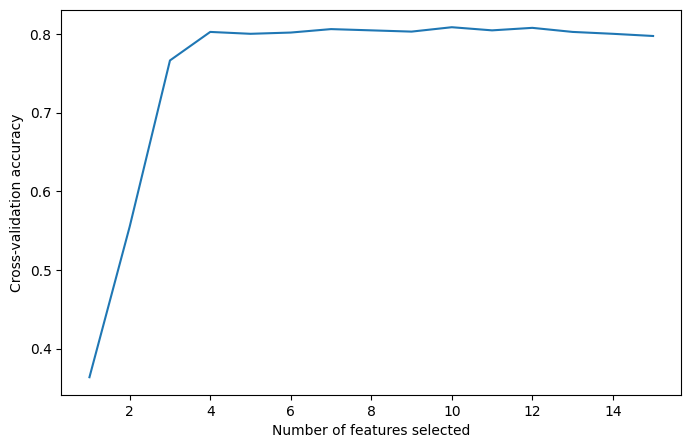

In [168]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Select predictors
X = data[['Age at Diagnosis', 'Type of Breast Surgery', 'Cellularity',
       'Chemotherapy', 'ER Status', 'PR Status', 'HER2 Status',
       'Pam50 + Claudin-low subtype', 'Neoplasm Histologic Grade',
       'Tumor Size', 'Tumor Stage', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Relapse Free Status']]

y = data['Patients_Vital_Status']

# Handle categorical encoding
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = X_encoded[col].astype(str)
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Fill missing values
X_encoded = X_encoded.fillna(X_encoded.median())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# RFECV with RandomForest
clf = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_scaled, y)

# Results
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", list(X.columns[rfecv.support_]))

# Feature ranking
feature_ranking = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfecv.ranking_,
    "Selected": rfecv.support_
}).sort_values("Ranking")
print("\nFeature ranking:")
print(feature_ranking)

# Plot accuracy vs number of features
plt.figure(figsize=(8,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
         rfecv.cv_results_['mean_test_score'])
plt.show()


In [169]:
data.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patients_Vital_Status'],
      dtype='object')

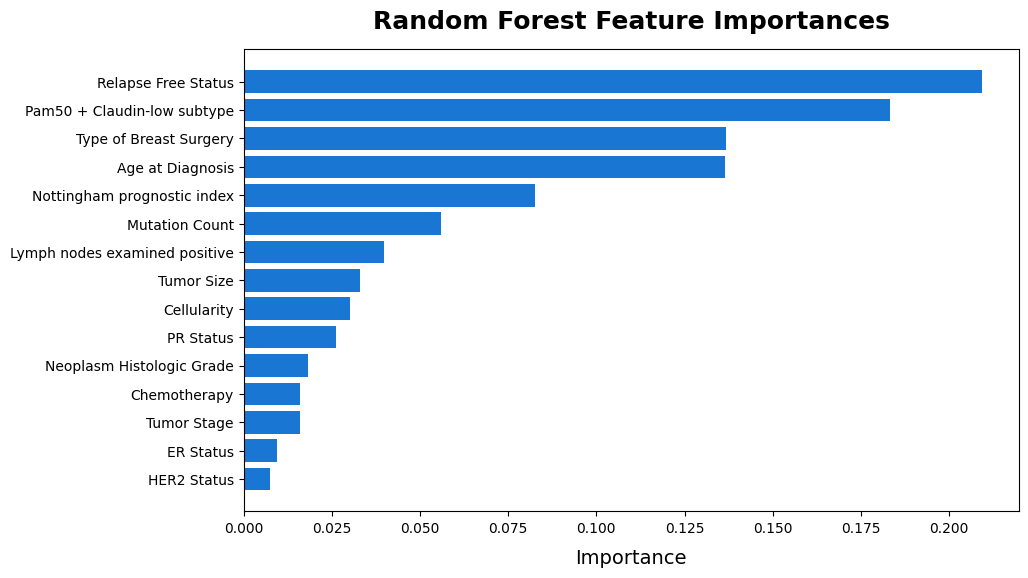


Feature Importance Ranking:
                          Feature  Importance
14            Relapse Free Status    0.209249
7     Pam50 + Claudin-low subtype    0.183290
1          Type of Breast Surgery    0.136700
0                Age at Diagnosis    0.136407
13    Nottingham prognostic index    0.082481
12                 Mutation Count    0.055897
11  Lymph nodes examined positive    0.039824
9                      Tumor Size    0.032888
2                     Cellularity    0.030073
5                       PR Status    0.026134
8       Neoplasm Histologic Grade    0.018183
3                    Chemotherapy    0.016068
10                    Tumor Stage    0.015851
4                       ER Status    0.009448
6                     HER2 Status    0.007508


In [170]:
# ==============================
# Breast Cancer Feature Importance (Random Forest)
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 2. Select predictors (X) and target (y)
X = data[['Age at Diagnosis', 'Type of Breast Surgery', 'Cellularity',
          'Chemotherapy', 'ER Status', 'PR Status', 'HER2 Status',
          'Pam50 + Claudin-low subtype', 'Neoplasm Histologic Grade',
          'Tumor Size', 'Tumor Stage', 'Lymph nodes examined positive',
          'Mutation Count', 'Nottingham prognostic index', 'Relapse Free Status']]

y = data['Patients_Vital_Status']

# 3. Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = X_encoded[col].astype(str)
    X_encoded[col] = le.fit_transform(X_encoded[col])

# 4. Handle missing values (numeric → median)
X_encoded = X_encoded.fillna(X_encoded.median())

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 6. Train Random Forest on full dataset
clf_full = RandomForestClassifier(random_state=42)
clf_full.fit(X_scaled, y)

# 7. Create dataframe with feature importances
dset = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf_full.feature_importances_
})
dset = dset.sort_values(by='Importance', ascending=True)

# 8. Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(y=dset['Feature'], width=dset['Importance'], color='#1976D2')
plt.title('Random Forest Feature Importances', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Importance', fontsize=14, labelpad=10)
plt.show()

# 9. Print ranked features
print("\nFeature Importance Ranking:")
print(dset.sort_values(by="Importance", ascending=False))


In [171]:
print(df.columns.tolist())

['Age at Diagnosis', 'Neoplasm Histologic Grade', 'Tumor Stage', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Tumor Size', 'Chemotherapy_1', 'ER Status_1', 'PR Status_1', 'HER2 Status_1']


In [172]:
data.isnull().sum()

Patient ID                          0
Age at Diagnosis                    0
Type of Breast Surgery              0
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                         0
Chemotherapy                        0
Pam50 + Claudin-low subtype         0
Cohort                             11
ER status measured by IHC           0
ER Status                           0
Neoplasm Histologic Grade           0
HER2 status measured by SNP6        0
HER2 Status                         0
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive       0
Mutation Count                      0
Nottingham prognostic index         0
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                           0
Radio Therap

In [173]:
data['Patients_Vital_Status'].isnull().sum()

np.int64(0)

In [174]:
data['Patients_Vital_Status'].value_counts() 

Patients_Vital_Status
2    837
0    646
3    529
1    497
Name: count, dtype: int64

In [175]:
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patients_Vital_Status
0,MB-0000,75.65,1,0,2,0,0,6,1.0,1,...,Living,0,1,138.65,0,Female,ER-/HER2-,4,2.021334,2
1,MB-0002,43.19,0,0,2,0,0,2,1.0,1,...,Living,1,1,83.52,0,Female,ER+/HER2- High Prolif,3,1.006344,2
2,MB-0005,48.87,1,0,2,0,1,3,1.0,1,...,Deceased,1,0,151.28,1,Female,NaN,4,2.021334,0
3,MB-0006,47.68,1,0,5,2,1,3,1.0,1,...,Living,1,1,162.76,0,Female,NaN,5,2.021334,2
4,MB-0008,76.97,1,0,5,0,1,3,1.0,1,...,Deceased,1,1,18.55,1,Female,ER+/HER2- High Prolif,6,2.021334,0


In [176]:
#Train test split
X = data[['Age at Diagnosis', 'Type of Breast Surgery', 'Cellularity',
          'Chemotherapy', 'ER Status', 'PR Status', 'HER2 Status',
          'Pam50 + Claudin-low subtype', 'Neoplasm Histologic Grade',
          'Tumor Size', 'Tumor Stage', 'Lymph nodes examined positive',
          'Mutation Count', 'Nottingham prognostic index', 'Relapse Free Status']]
y = data['Patients_Vital_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [178]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy_value = round(accuracy*100,2)
print(accuracy_value)

81.27


In [179]:
model2 = DecisionTreeClassifier(criterion = 'gini')
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test,pred2)
accuracy_value2 = round(accuracy*100,2)
print(accuracy_value2)

73.71


In [180]:
model3 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=11)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, pred3)
accuracy_value3 = round(accuracy * 100, 2)
print(accuracy_value3)

78.88


In [181]:
model4 = SVC(kernel='linear', C=1.0)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
accuracy = accuracy_score(y_test, pred4)
accuracy_value4 = round(accuracy * 100, 2)
print(accuracy_value4)

81.47


Precision: 0.81
Recall: 0.81
F1-score: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       124
           1       0.64      0.52      0.57        98
           2       0.75      0.73      0.74       160
           3       0.99      0.99      0.99       120

    accuracy                           0.81       502
   macro avg       0.80      0.80      0.80       502
weighted avg       0.81      0.81      0.81       502


Confusion Matrix:
 [[121   0   3   0]
 [ 12  51  35   0]
 [ 13  29 117   1]
 [  1   0   0 119]]


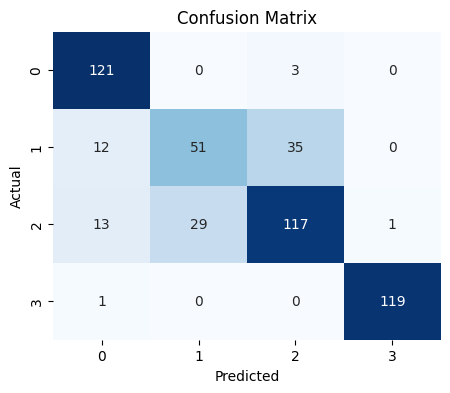


ROC-AUC (Multiclass): 0.94


In [183]:

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)   # probabilities for ROC

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1-score:", round(f1, 2))

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
if len(model.classes_) == 2:
    # Binary classification (only probability of positive class)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    print("\nROC-AUC (Binary):", round(roc_auc, 2))

    # Plot ROC Curve
    RocCurveDisplay.from_estimator(model5, X_test, y_test)
    plt.title("ROC Curve (Binary)")
    plt.show()

else:
    # Multiclass classification
    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
    print("\nROC-AUC (Multiclass):", round(roc_auc, 2))


In [185]:
file_path = r"breastcancer1.xlsx"

data.to_excel(file_path, index=False)

print(f"Dataset saved at: {file_path}")

Dataset saved at: breastcancer1.xlsx
